# Task 2 : Prediction using Unsupervised ML

# Name : Aatif Nisar



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset

df=pd.read_csv('Iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
# Drop column 'Id' as we dont need that

df.drop(["Id"],axis=1,inplace=True)


In [4]:
# Display Columns names

df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Number of rows and Columns

df.shape

(150, 5)

In [6]:
# Display first 10 rows

df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# Select features (Independent variables)

features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [14]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
# Ignoring the warnings 

import warnings
warnings.filterwarnings("ignore")

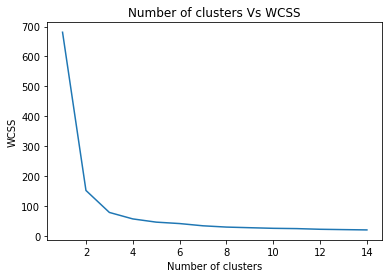

In [9]:
# Elbow Method

plt.plot(range(1, 15), wcss)
plt.title('Number of clusters Vs WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # WCSS = Within cluster sum of squares
plt.show()

In [10]:
# The optimal value of k is between 2 and 4. Hence k=3
# Implement K_means clustering with k=3

kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)
kmeans_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

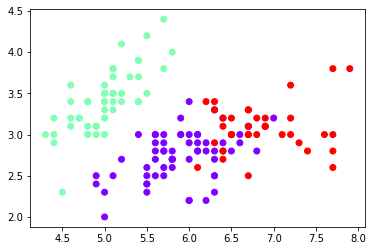

In [12]:
# Visualizing clusters

plt.scatter(df.iloc[:, 0].values,df.iloc[:, 1].values,c=kmeans_predict,cmap='rainbow')
#or
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],c=kmeans_predict,cmap='rainbow')


In [13]:
#Each color Represents a different cluster